In [1]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

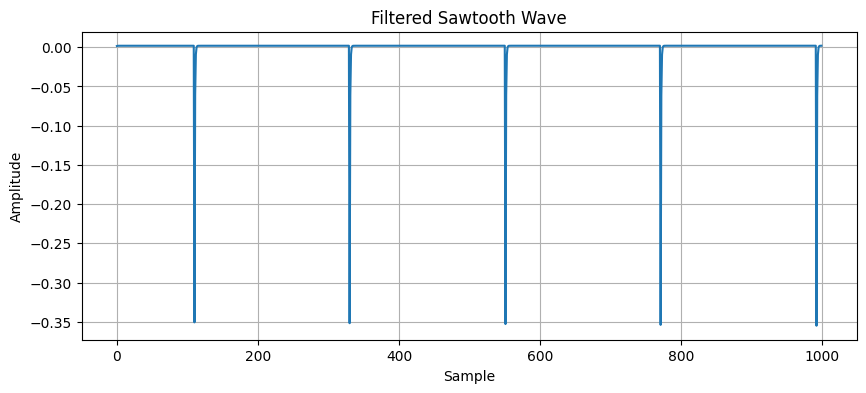

In [2]:
filtered_saw = synth.filter_audio(synth.sawtooth_wave([1], [200], 10), synth.sawtooth_wave([1], [0.4], 10)*1400 + 1500, True)

display(Audio(filtered_saw, rate=44100))
plt.figure(figsize=(10, 4))
plt.plot(filtered_saw[:1000])
plt.title("Filtered Sawtooth Wave")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [3]:
sine = synth.sine_wave([1], [250], 10)
display(Audio(sine, rate=44100))

clipped_sine = synth.soft_clip(sine, [1, 5, 2, 30])
display(Audio(clipped_sine, rate=44100))

In [4]:
def find_peaks(y):

    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    dips = np.where((y[1:-1] < y[0:-2]) * (y[1:-1] < y[2:]))[0] + 1

    return np.sort(np.concatenate((peaks, dips)))

[22048 33073 44098 55123 66148 77174]


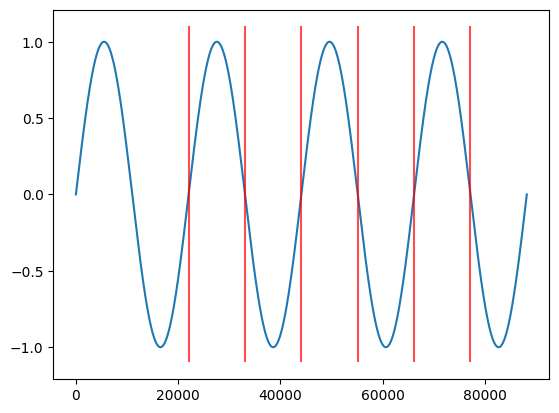

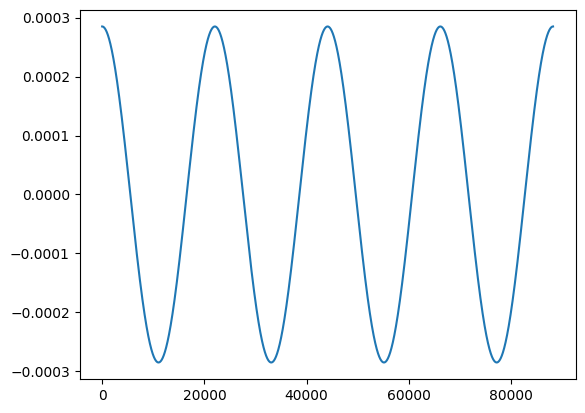

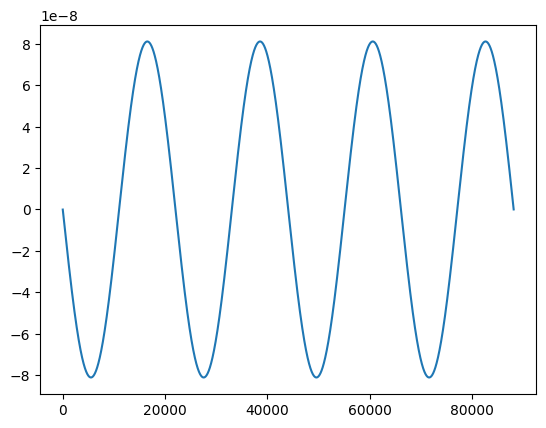

In [5]:
adsr = np.tile(synth.adsr(0.2, 0.2, 0.6, 0.2, 0.2, 2),2)
adsr = synth.sine_wave([1], [2], 2)
diff = np.diff(adsr)

plt.plot(adsr)
peaks = find_peaks(diff)
print(peaks)
plt.vlines(peaks, ymin=plt.ylim()[0], ymax=plt.ylim()[1], colors='red', alpha=0.7, label="peaks")

plt.show()

plt.plot(diff)
plt.show()

d_diff = np.diff(diff)
plt.plot(d_diff)
plt.show()


In [6]:
peaks = find_peaks(diff)

print(peaks)

[22048 33073 44098 55123 66148 77174]


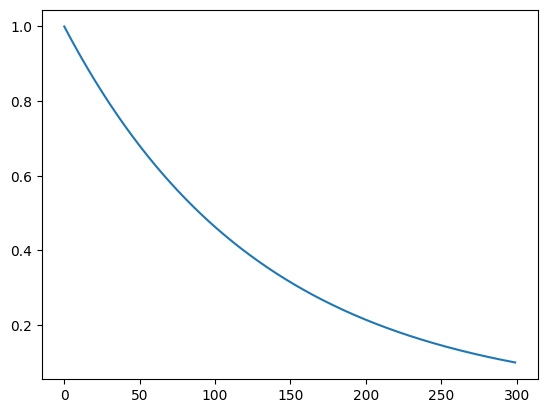

In [10]:
adsr = np.tile(synth.adsr(0.01, 0.2, 0, 0.2, 0.1),2)
audio = synth.sawtooth_wave(adsr, [440], 4)
audio = synth.delay(audio, 0.05, 0.98)

display(Audio(audio, rate=44100))

plt.plot(np.logspace(1,0,300)/10)